# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To supress warnings
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [2]:
#loading the data set
data=pd.read_csv('stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


Viewing of the random sample of the data looks okay

In [4]:
#Checking the shape of the data
data.shape

(340, 15)

In [5]:
#Checking for duplicated data
data.duplicated().sum()

0

- There are 340 rows and 15 columns in the data set

In [6]:
#Checking the data types and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- In this data set, there are 7 float variables, 4 integer variables and 4 object variables.
- We will change the object types to category to conserve memory

In [7]:
# convert all columns with dtype object into category
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

In [8]:
# confirm new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

In [9]:
#Checking the statistical properties of the numerical variables in the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


Observations:
- We can observe that for many of the variables including current price, ROE, Cash ratio, Net Cash flow Net income, Estimated shares outstanding and P/E ratio, the average is higher than the median, hence they will be  right skewed in distribution.
- Others show the presence of outliers though it looks like a relatively normal distribution
- We can also see that we have various ranges for Meand and Standard deviation, hence it is important that we scale the data.


In [10]:
#provide statistical summary of all categorical columns
data.describe(include='category').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,3M Company,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


- The Ticker symbol and security have 340 unique values, hence they can be dropped.
- We will drop the ticker symbol now, however we will leave the security symbol as we will like to use it in future to identify members of a cluster 
- There are 11 different GICS sectors and 104 GICS Sub industry values.
- The Industrial sector has the highest number of appearances in the GICS sector
- The Oils and Gas Exploration and Production Sub industry occurs the most

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [11]:
#Creating a copy of the data set
df=data.copy()

In [12]:
#dropping the ticker variable
df=df.drop('Ticker Symbol', axis=1)

In [13]:
#creating a dataset for the numerical columns only
num_col = ['Price Change', 'Volatility', 'Cash Ratio', 'Net Cash Flow', 'Earnings Per Share', 'Current Price' ,'Estimated Shares Outstanding','P/E Ratio','P/B Ratio'] 

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

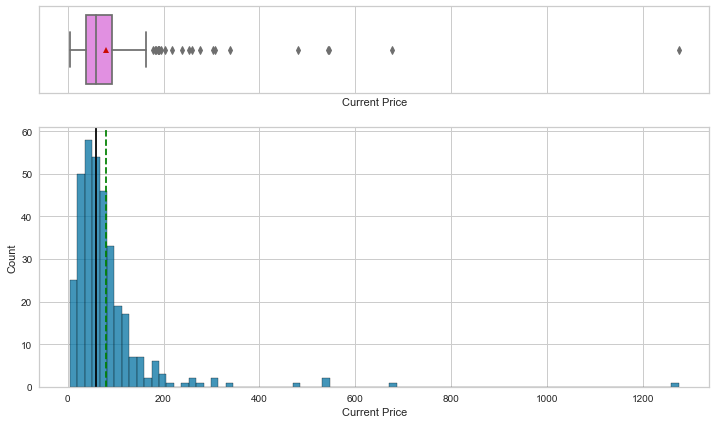

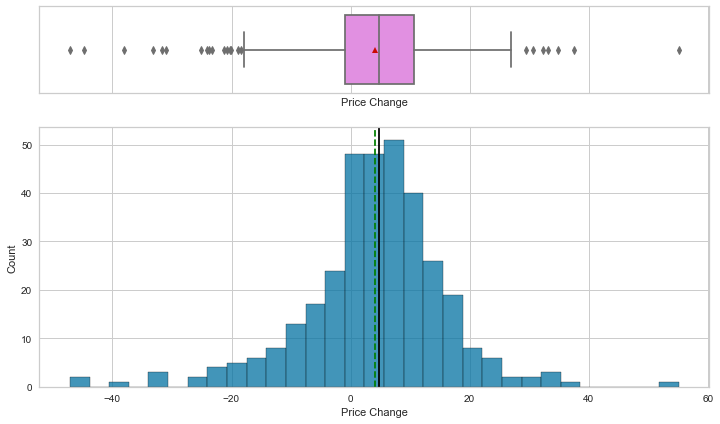

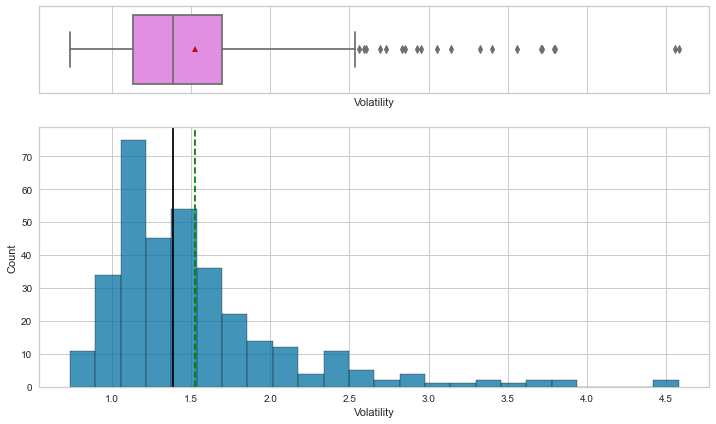

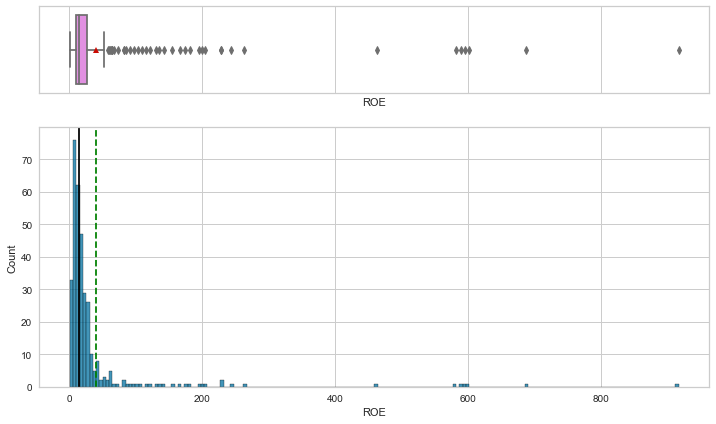

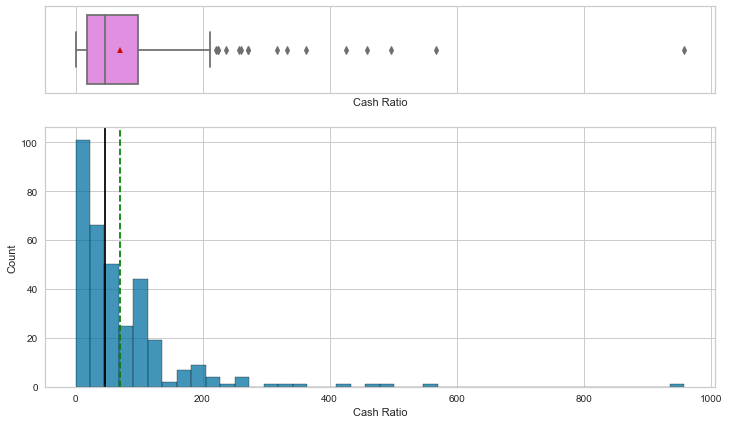

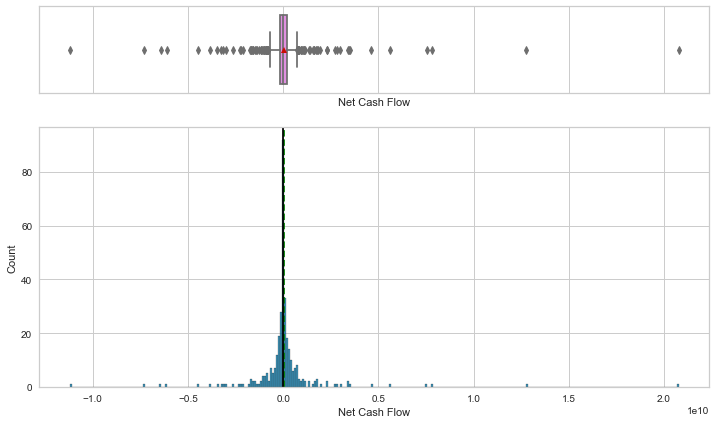

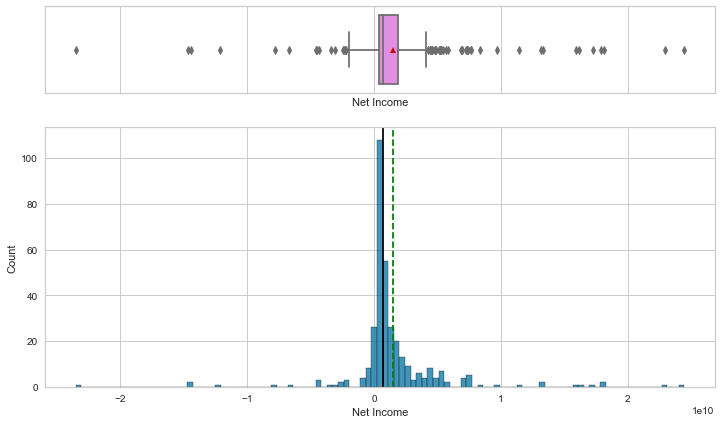

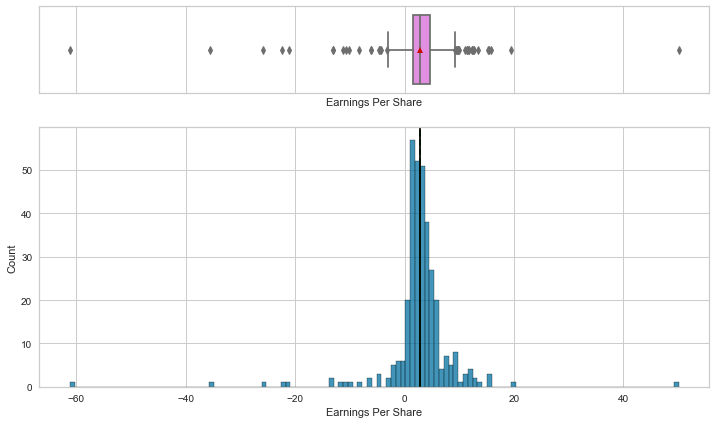

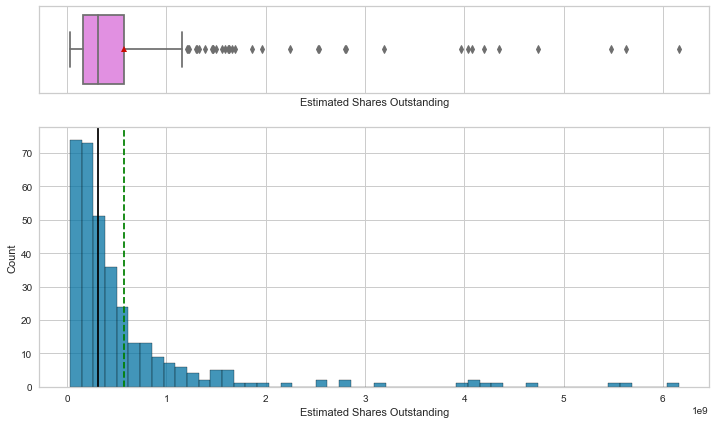

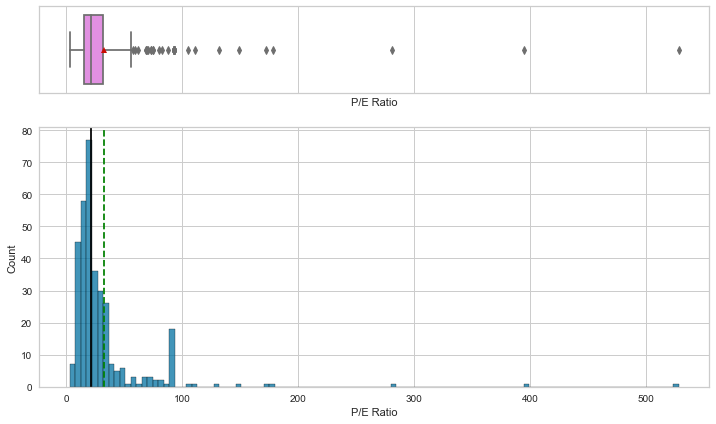

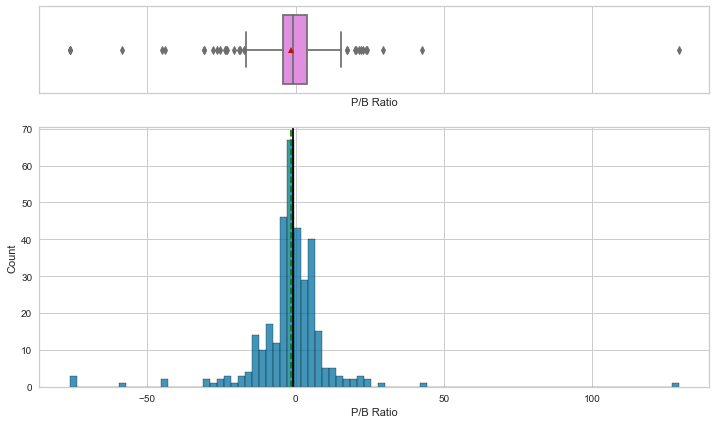

In [15]:
#create list of columns with numerical variables
num_col = df.select_dtypes(include=np.number).columns.tolist()

#display histograms and boxplots for all numerical columns
for col in num_col:
    histogram_boxplot(df, col)

##### Current price
- We can see that the distribution is very right skewed, with many positive outliers. There are no outliers to the left and no stock is listed at lessthan 0 dollars

##### Price Change
- We can see that the distribution is a relatively normal distribution though there are quite some positive and negative outliers

##### Volatility
- We can see that the distribution is right skewed, with many positive outliers. There are no negative outliers

##### ROE
- We can see that the distribution is very right skewed, with many positive but no negative outliers. No stock here is less than 0 dollars

##### Cash Ratio
- We can see that the distribution is very right skewed, with many positive but no negative outliers and no stock here is less than 0 dollars

##### Net Cash flow
- We can see that the distribution is a relatively normal distribution and there are some positive and negative outliers

##### Net Income
- We can see that the distribution shows a slight right skew with some outliers on the left and right
- we can observe that some companies show a net income of less than 0 dollars

##### Earnings per share
- We can see that the distribution is slightly right skewed, with both negative and positive outliers. we see that it is similar in distribution to Net income and it is not surprising as its a derivative of the net income

##### Estimated Shares Outstanding
- We can see that the distribution is very right skewed, with many outliers on the positive side

##### P/E Ratio
- We can see that the distribution is very right skewed, with positive outliers. we can also see that all ratios have positive values.

##### P/B Ratio
- We can see that the distribution is a relatively normal distribution though there are quite some positive and negative outliers


In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )


    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

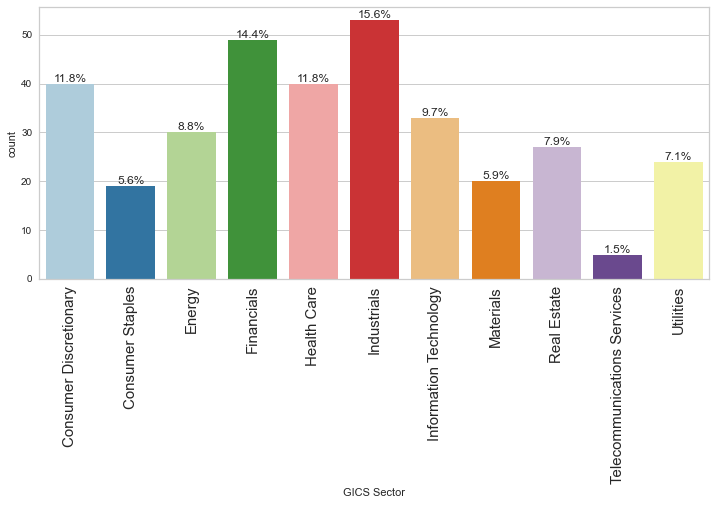

In [17]:
#plotting a labeled barplot for the GICS sector
labeled_barplot(df, 'GICS Sector', perc=True)

- The GICS sector with the most stock is the industries sector with 15.6%
- The top 5 in terms of count are industries, financials, Health care, consumer discretionary and Information technology. 
- Telecoms services has the least number of stocks.

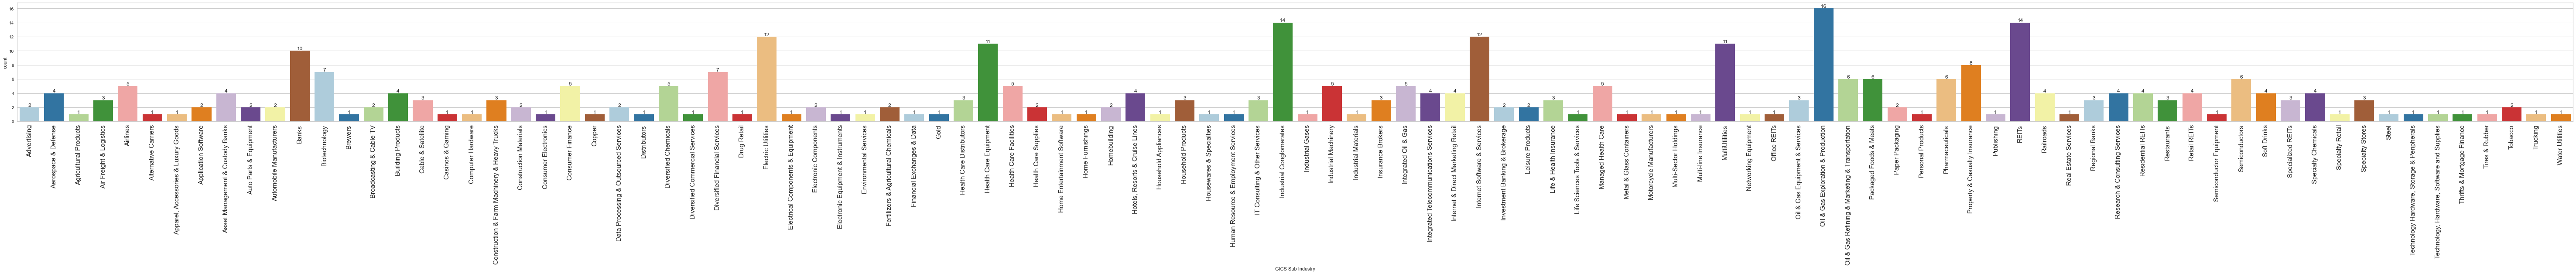

In [18]:
#plotting a labeled barplot for the GICS sector
labeled_barplot(df, 'GICS Sub Industry')

- We can't get much information from this chart as there are 104 different sub categories, we can however view the sub industries with the most number of stocks and least number of stocks.

In [19]:
#display the five sub industries with the most number of stocks
df['GICS Sub Industry'].value_counts().head(n=5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
Name: GICS Sub Industry, dtype: int64

- the highest number of stocks on the chart is 16, with Oil & Gas Exploration & Production sub industry topping the list

In [20]:
#display the five sub industries with the least number of stocks
df['GICS Sub Industry'].value_counts().tail(n=5)

Metal & Glass Containers    1
Motorcycle Manufacturers    1
Multi-Sector Holdings       1
Multi-line Insurance        1
Water Utilities             1
Name: GICS Sub Industry, dtype: int64

- the lowest number of stocks on the chart is 1

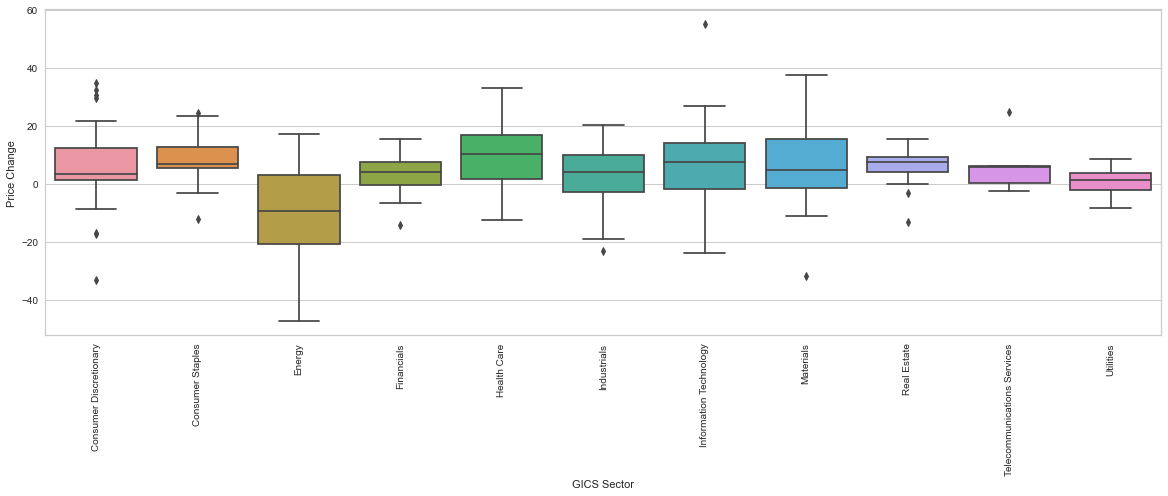

In [21]:
# plotting a boxplot to show various GICS sector and their  Price change
plt.figure(figsize=(20,6))
sns.boxplot(data = df, y = "Price Change", x = "GICS Sector");
plt.xticks(rotation=90)
plt.show()

- The healthcare sector has the highest price increase (positive), closely followed by the consumer discretionary GICS sector. The sector with the lowest positive price change is the telecoms service sector. energy sector has shown a huge negative price change
- In terms of variation, real estate has the least variation in Price Change across different companies. Energy GICS_Sector on the other hand has seen the most variation 

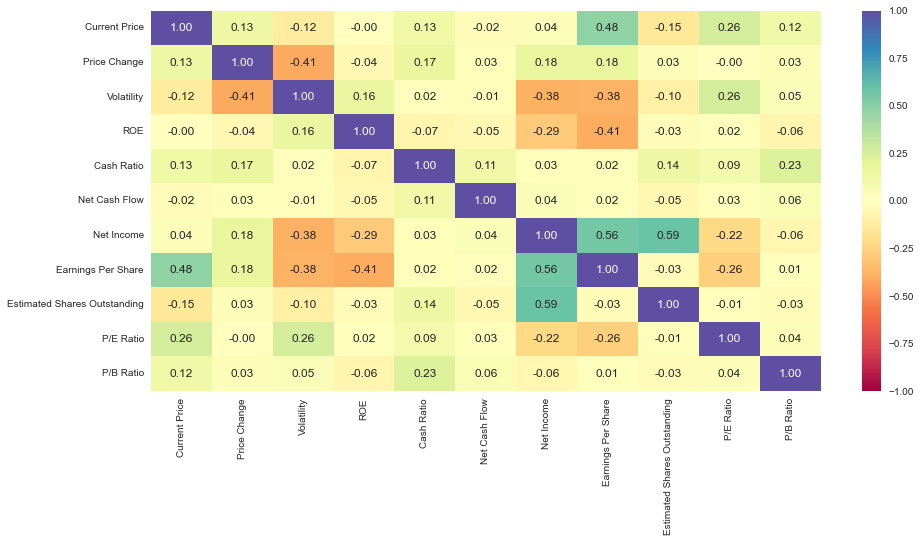

In [22]:
#Creating a correlation plot for all numeric variables
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations from the correlation plot
#### We can observe correlations between some of the variables, some of them are"
- Earnings per share has a positive correlation with Net income and current price
- Estimated shares outstanding has a positive correlation with net income
- Price change has a strong negative correlation with volatility
- ROE has a negative correlation with Earnings per share 
- Earnings per share is negatively correlation with volatility
- Net income and volatility are also negatively correlates
- Earnings per share and P/E ratio also show negative correlation


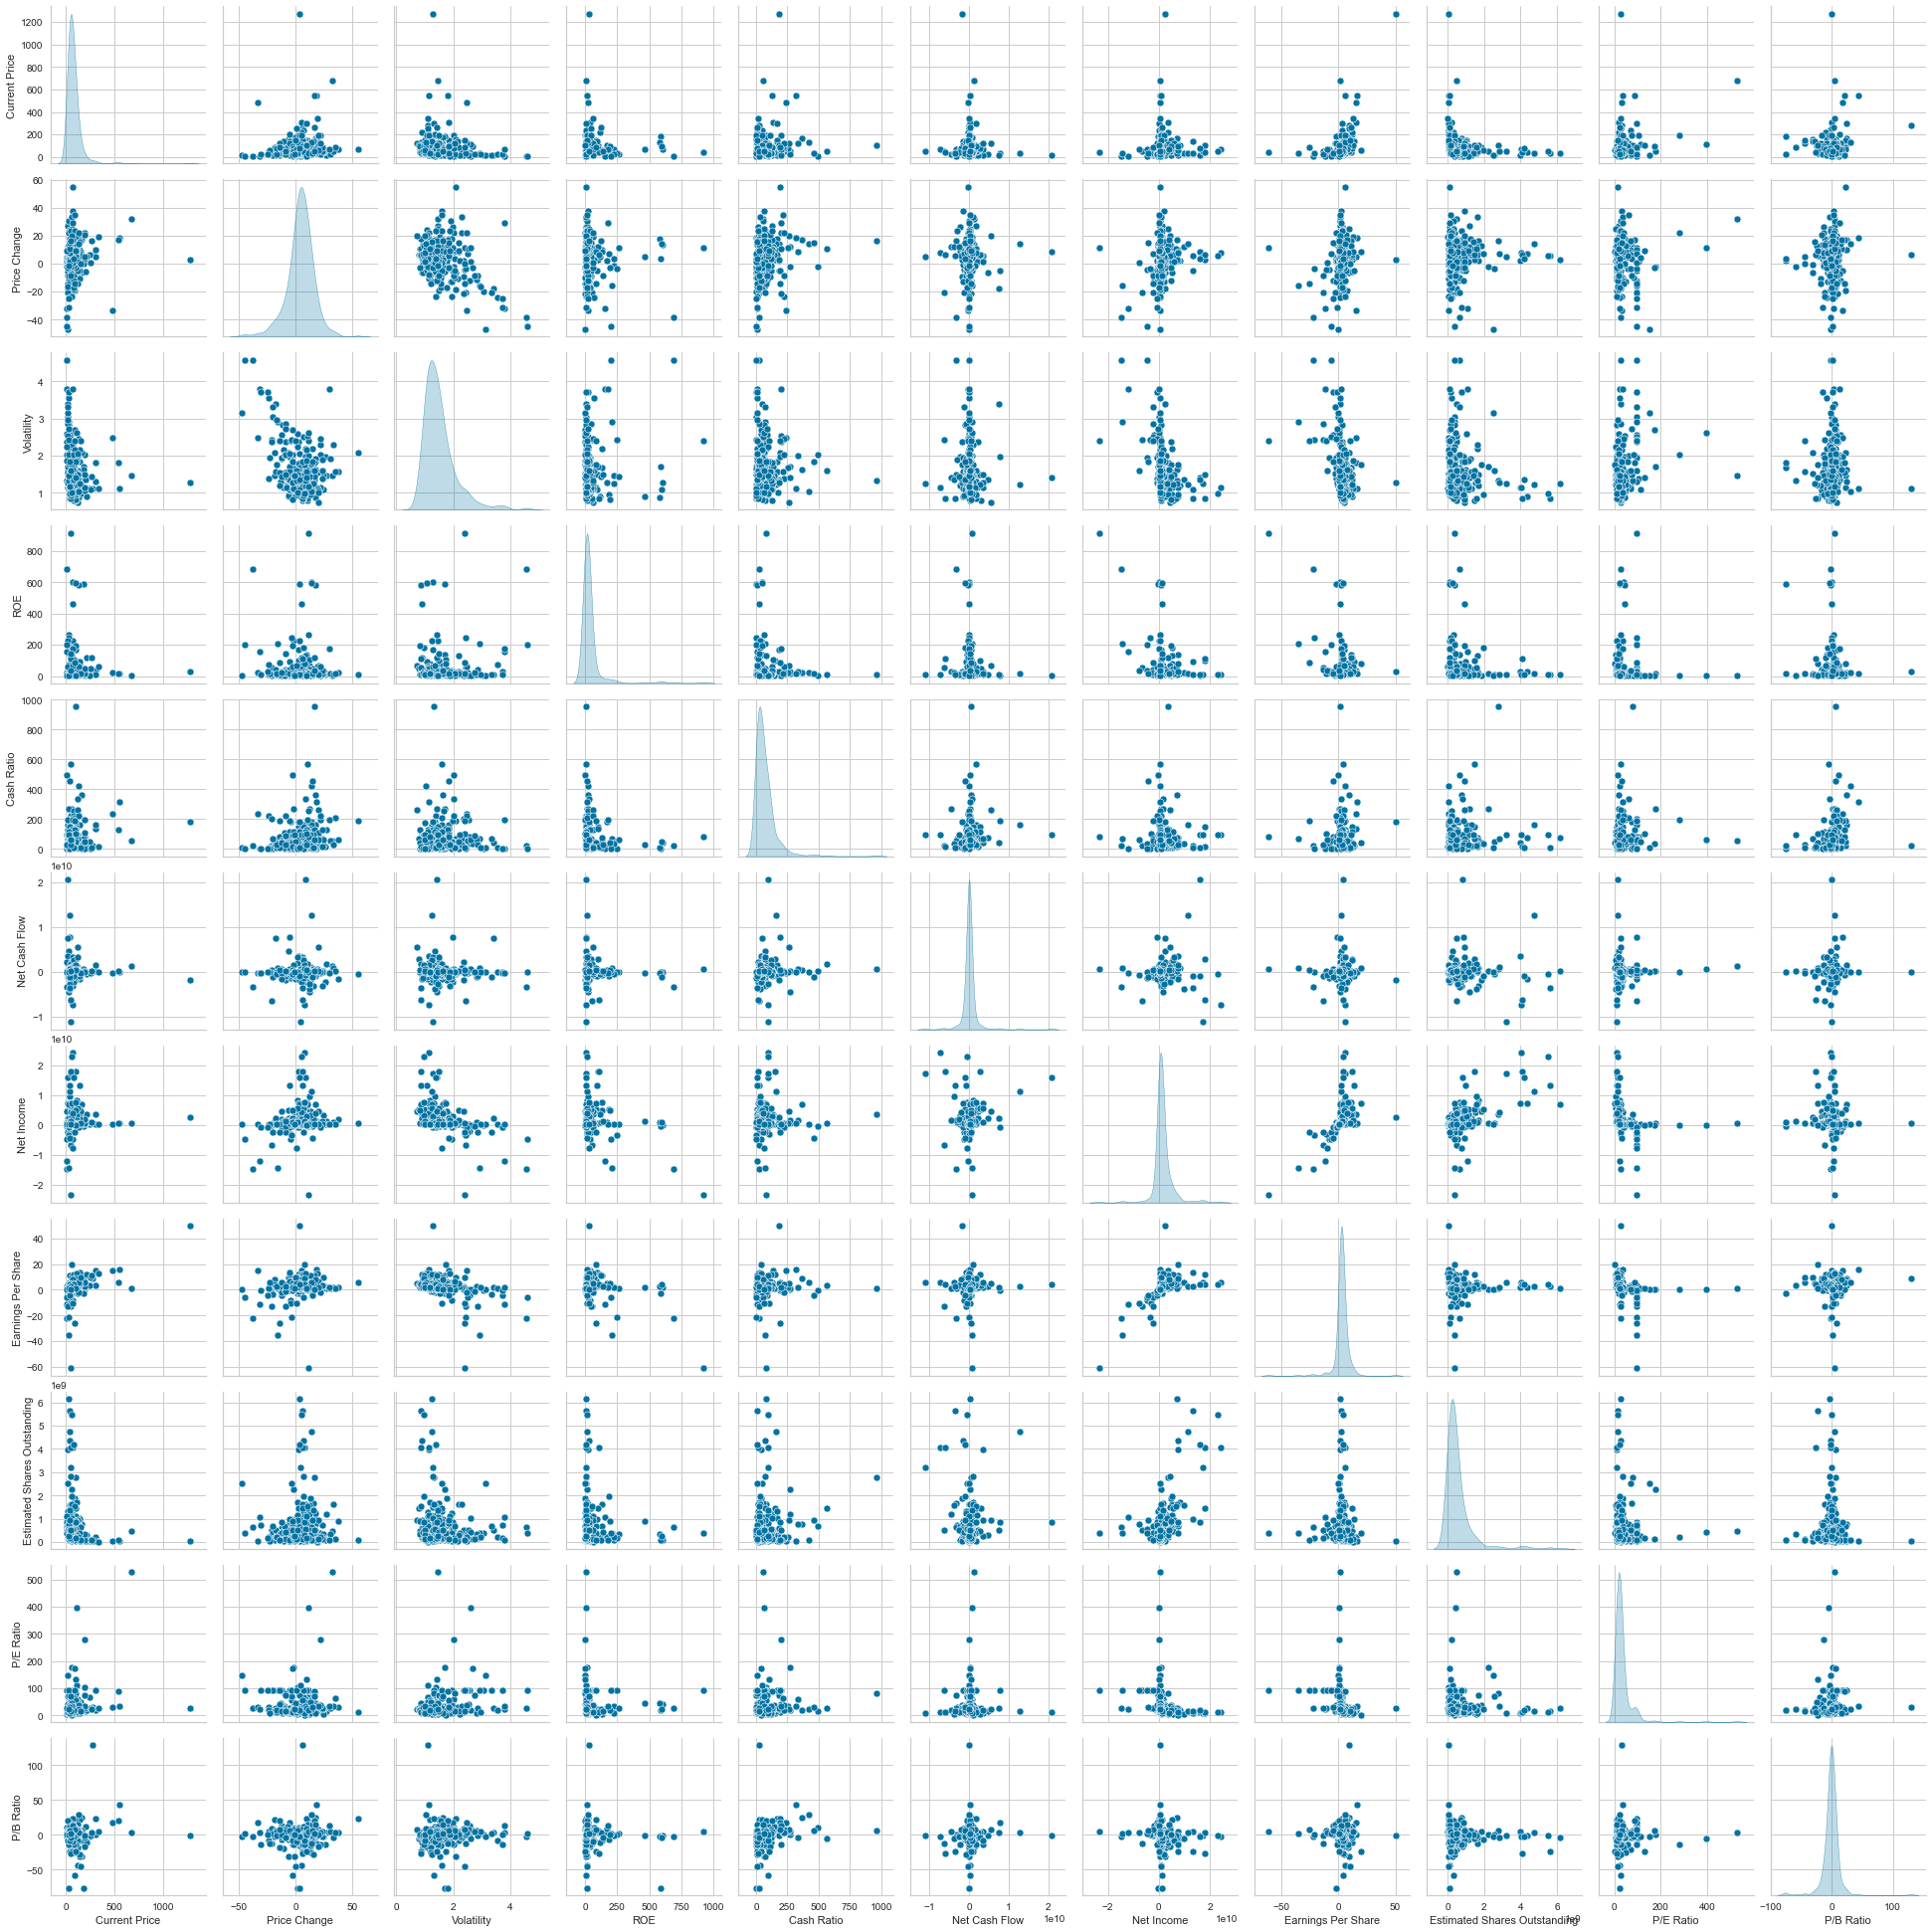

In [23]:
# Creatinga pair plot for the numerical columns
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

Observations
- from the pairplot, we see that P/E ratio looks bimodal while the others show what looks like a normal distribution with longtails. 

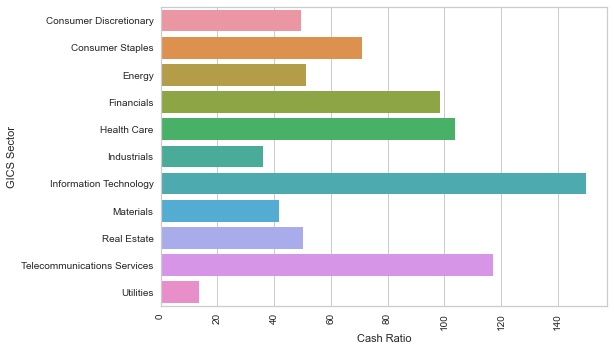

In [24]:
# plotting a barplot to show how cash ratios vary across the  GICS sector
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

- The GICS sector with the highest cash ratio on average is information technology, followed by the telecoms services!
- The sector with the lowest cash ratio is the utilities sector with a cash ratio that is below 20

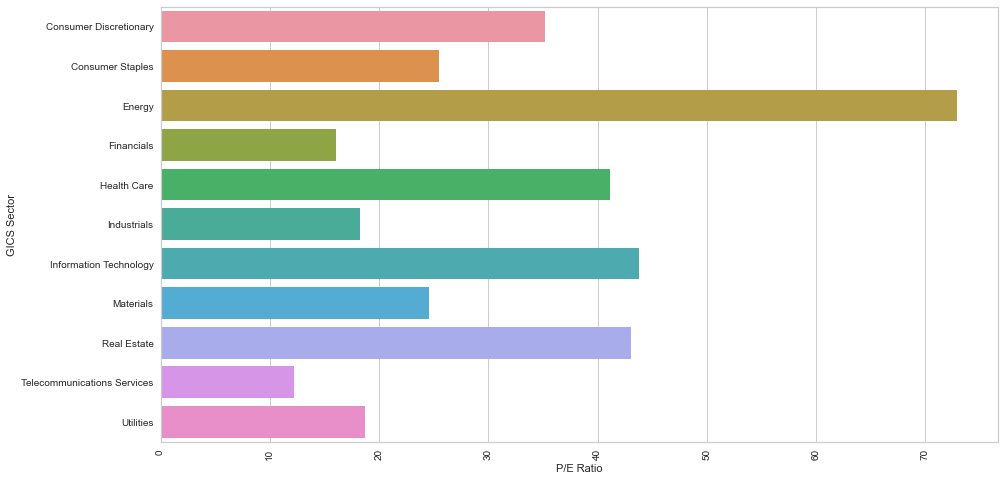

In [25]:
# plotting a barplot to show how P/E ratios vary across GICS sector
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

- The GICS sector with the highest P/E ratio is the Energy sector while telecom services has the lowest ratio

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [26]:
# Checking for duplicates
df.duplicated().sum()

0

- There are no duplicates in the data set

In [27]:
#Checking for null values
df.isnull().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no missing values in the data set

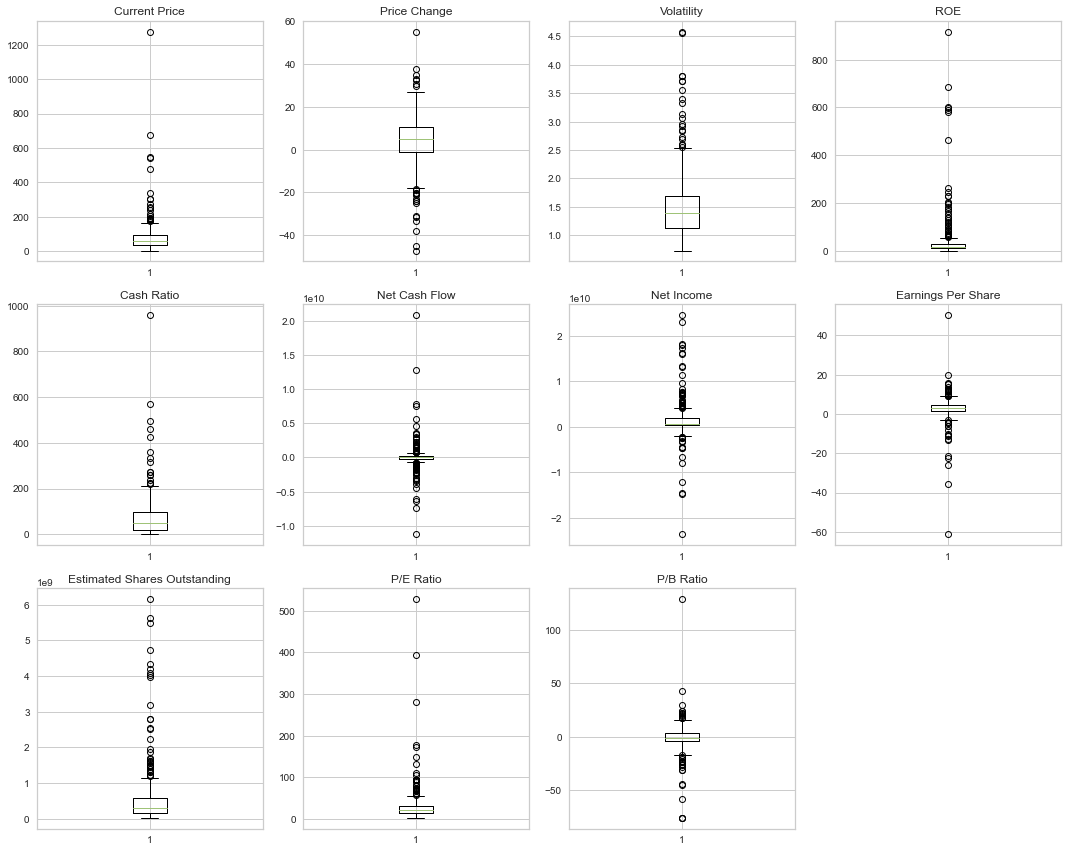

In [28]:
#Checking for outliers
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All variables in the data set have outliers 
- Variables like current price,cash ratio, estimated shares outstanding,P/E ratio and ROE have outliers only on the positive side of their distribution, while others have outliers on bothb the positive and negative
- None of these values appear to be unrealistic if we consider how stock prices work therefore we will not be treating the outliers

In [29]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [30]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

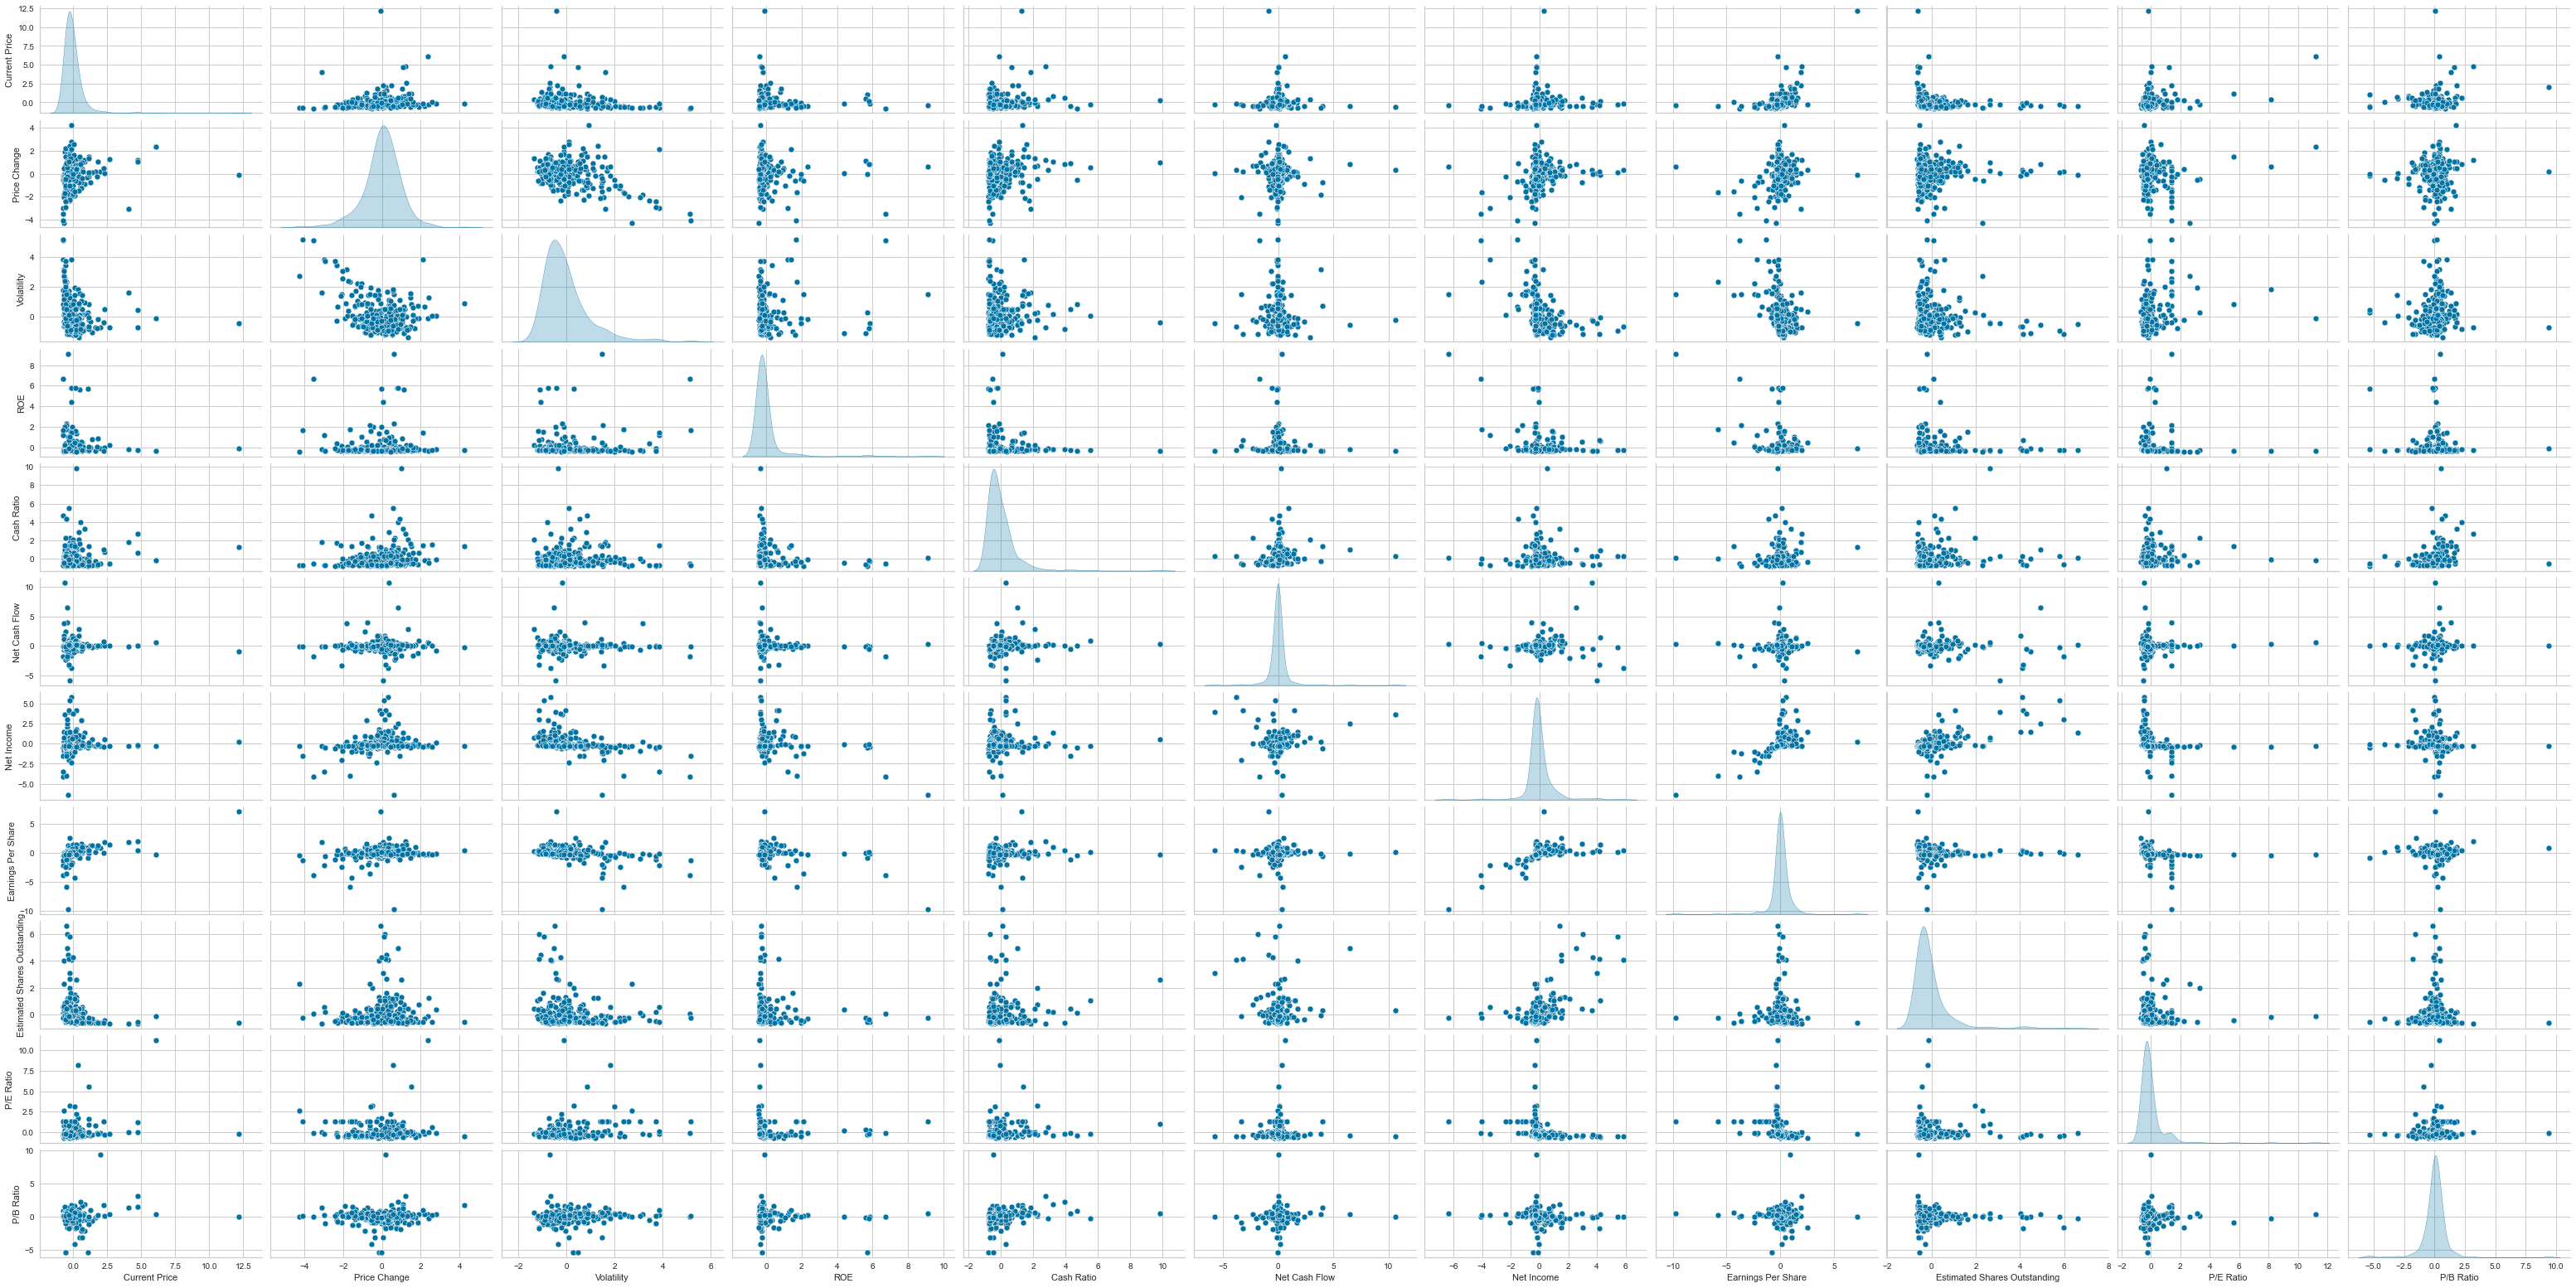

In [31]:
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')
plt.show()

- After scaling our data, we can see that the distribution of each variable and relationship between other variables haven't changed.
- All variables are now on the same scale with a mean of 0 and Standard deviation of 1 


## K-means Clustering

In [32]:
#Creating a new dataframe 
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2668604252073914
Number of Clusters: 4 	Average Distortion: 2.178151429073042
Number of Clusters: 5 	Average Distortion: 2.1059351899972185
Number of Clusters: 6 	Average Distortion: 2.0737104927328227
Number of Clusters: 7 	Average Distortion: 2.0243225037323787
Number of Clusters: 8 	Average Distortion: 1.9673218319395012
Number of Clusters: 9 	Average Distortion: 1.9315144779472586
Number of Clusters: 10 	Average Distortion: 1.8793593831619793
Number of Clusters: 11 	Average Distortion: 1.7911880929728
Number of Clusters: 12 	Average Distortion: 1.761852488462621
Number of Clusters: 13 	Average Distortion: 1.7072321556791124
Number of Clusters: 14 	Average Distortion: 1.6847112263588329


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

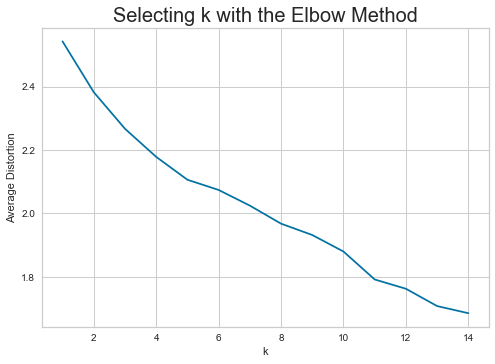

In [33]:
#printing average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779403
For n_clusters = 4, silhouette score is 0.45483520750820555
For n_clusters = 5, silhouette score is 0.43960640679154517
For n_clusters = 6, silhouette score is 0.411674639259373
For n_clusters = 7, silhouette score is 0.4145871494548404
For n_clusters = 8, silhouette score is 0.4090333123294673
For n_clusters = 9, silhouette score is 0.4090171173372503
For n_clusters = 10, silhouette score is 0.18372710698028952
For n_clusters = 11, silhouette score is 0.15789716945768612
For n_clusters = 12, silhouette score is 0.12458190574049469
For n_clusters = 13, silhouette score is 0.12202325647295156
For n_clusters = 14, silhouette score is 0.14503215419952833


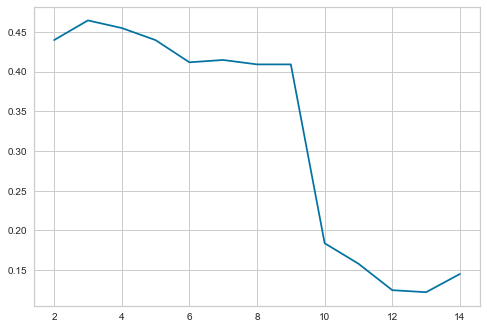

In [34]:
#Checking the silhouette scores for the range of K clusters
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score);

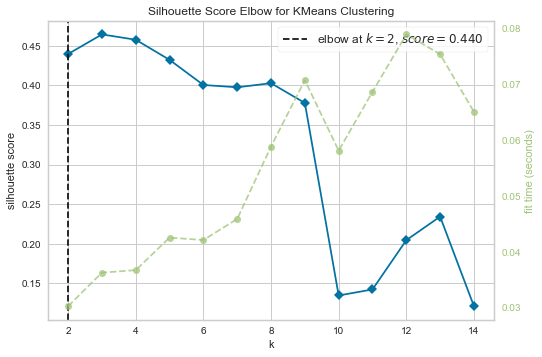

In [35]:
#Fit kmeans and use visualizer to indicate optimal k value using silhuette score as the metric
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  
visualizer.show();

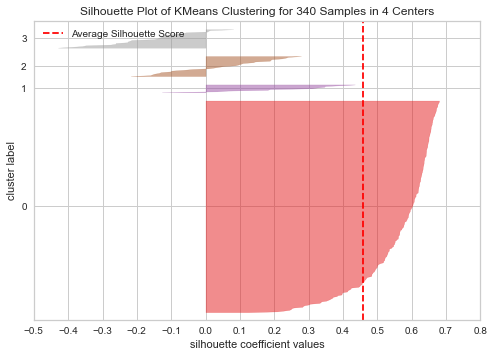

In [36]:
# Visualizing silhouette scores with 4 number of clusters
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show();

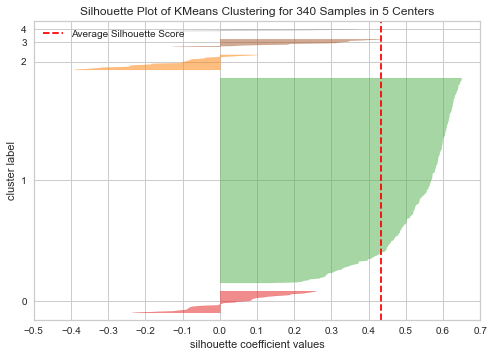

In [37]:
# Visualizing silhouette scores with 5 number of clusters
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled)
visualizer.show();

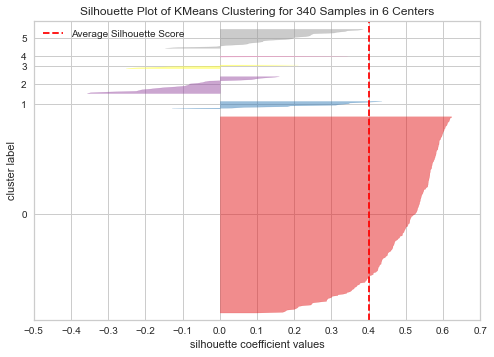

In [38]:
# Visualizing silhouette scores with 6 number of clusters
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled)
visualizer.show();

Observations
- From the elbow plots and looking at the distortions, the number of cluster choices seem best around 4, 5 and 6 clusters
- The best silhouette score is 3, but it doesn't look great in the elbow plot.
- 5 and 6 do not give great silhouette scores. Of the 3 choices from our elbow plot (4,5 and 6), 4 has the best silhouette score, so it's a good option to go for.
- The number of clusters that have great silhouette scores do not necessarily look great on the elbow curve.
- Thus, between the Elbow and Silhouette plots, 4 seems to be the number of clusters with good performance both ways 

### Final Model selection

In [39]:
%%time
#fitting the kmeans 4 clusters on the subscaled data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

CPU times: user 100 ms, sys: 82.4 ms, total: 183 ms
Wall time: 38.1 ms


KMeans(n_clusters=4, random_state=0)

In [40]:
#creating a copy of the dataframe
df1 = df.copy()

In [41]:
# adding kmeans cluster labels to the original dataframe
k_means_df["K_means_segments"] = kmeans.labels_ 
df1["K_means_segments"] = kmeans.labels_

In [42]:
#Profiling the clusters based on the means
k_cluster_profile = df1.groupby("K_means_segments").mean()

In [43]:
#Adding a new column that shows the count of securities in each cluster
k_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Security"].count().values)

In [44]:
# let's display cluster profiles
k_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


In [45]:
#Printing the companies in each cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 277
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 0, the following companies are present:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 25
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Apache Corporation', 'Anadarko Petroleum Corp', 'Baker Hughes Inc', 'Chesapeake Energy', 'Cabot Oil & 

In [46]:
#Printing the number of companies per cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the number of companies is:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].nunique())
    print()

In cluster 3, the number of companies is:
277

In cluster 0, the number of companies is:
25

In cluster 1, the number of companies is:
27

In cluster 2, the number of companies is:
11



In [47]:
#Printing the number in each GICS sector per cluster
df1.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          6
                  Consumer Staples                1
                  Energy                          1
                  Financials                      1
                  Health Care                     9
                  Industrials                     0
                  Information Technology          5
                  Materials                       0
                  Real Estate                     1
                  Telecommunications Services     1
                  Utilities                       0
1                 Consumer Discretionary          0
                  Consumer Staples                0
                  Energy                         22
                  Financials                      0
                  Health Care                     0
                  Industrials                     1
                  Information Technology          3
                  

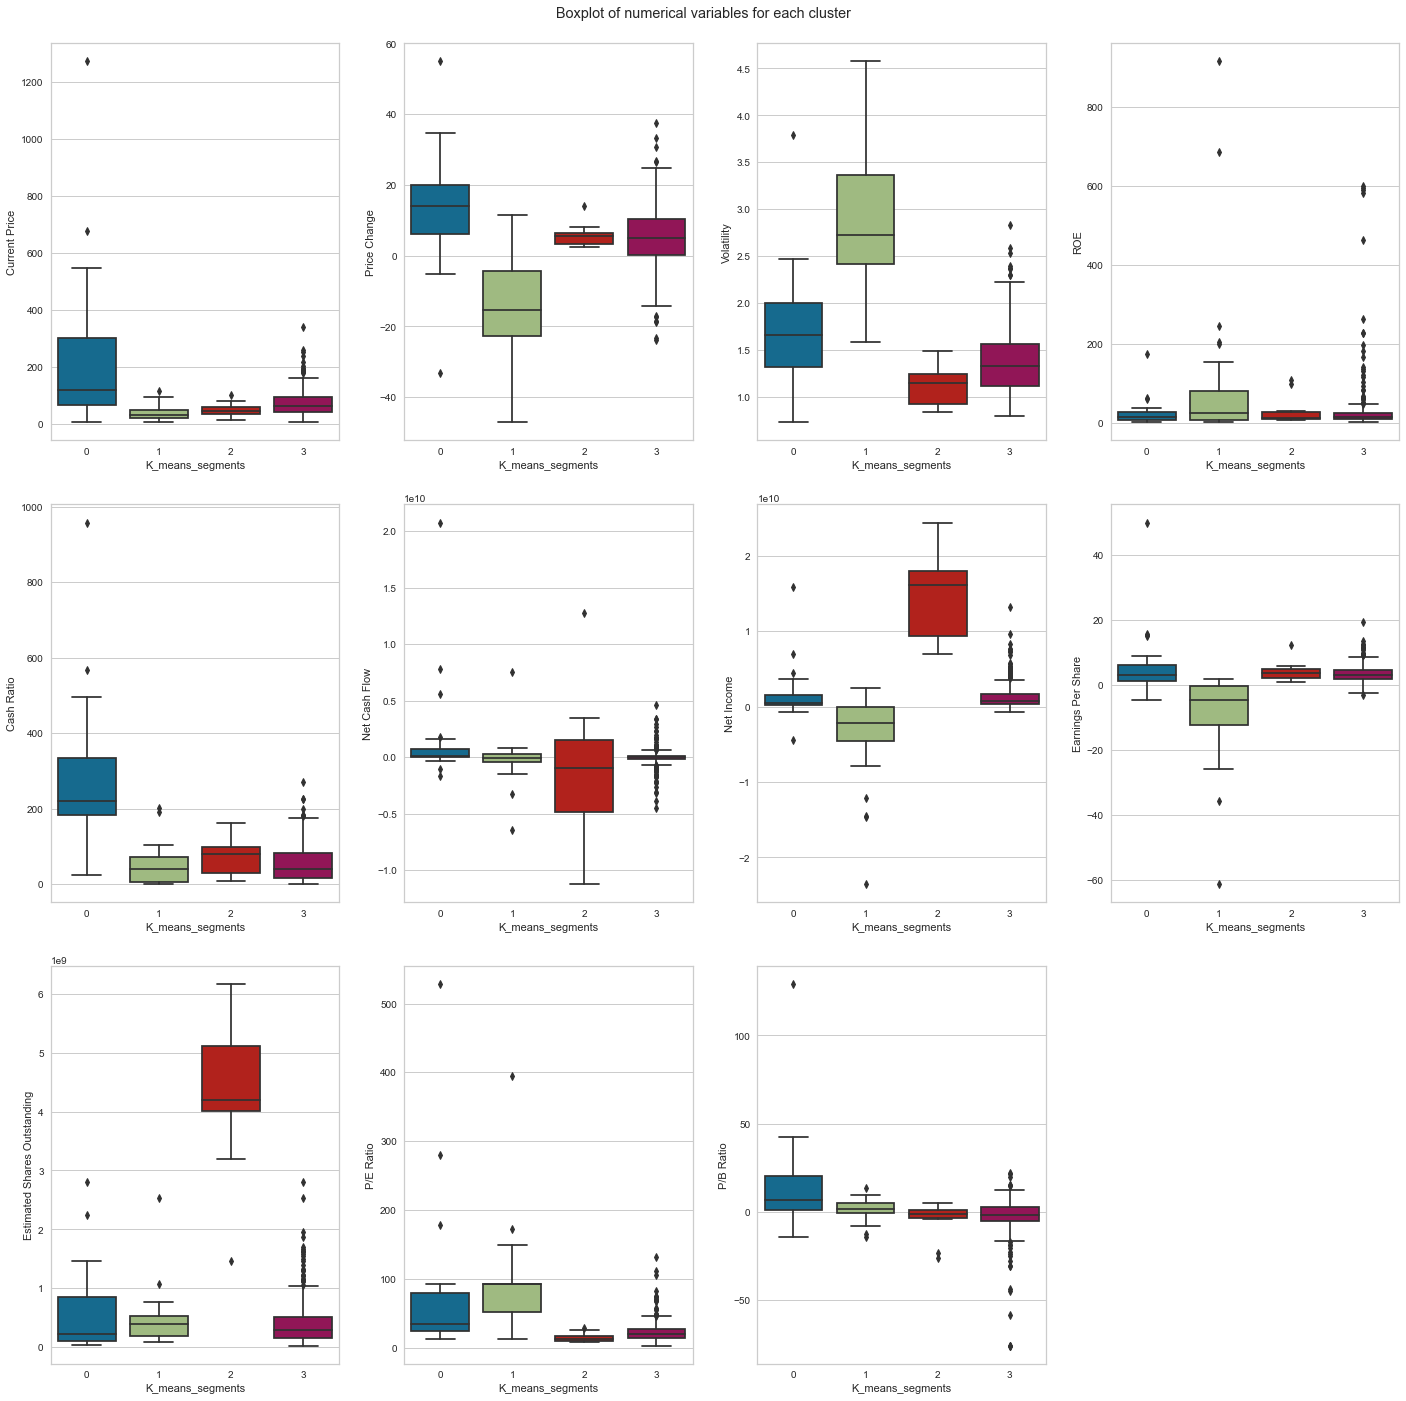

In [48]:
#plotting a box plot of each numerical variable for each cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### From the box plots, we can observe the following about each variable
- Cluster 0 has the highest current price and variance in current price. the lowest current price with very little variance is cluster 1
- Cluster 0 has the highest price change but cluster 1 has the highest variance in price change
- in terms of volatility, cluster 1 has the highest volatility and has the most variance in volatility
- Cluster 1 has the highest ROE and shows the most variance in ROE
- Cluster 0 has the highest cash ratio and shows the highest variance
- In Net cash flow, cluster 2 shows the highest variance.
- Cluster 2 has the highest net income and has the most variance of the 4 clusters
- Cluster 1 has lower earnings per share than others, and also has the most variance. cluster 0 has the largest earnings per share, but it's not significantly higher than clusters 2 and 3
- Cluster 2 has the highest estimated shares outstanding,this is a key feature significantly more than the other 3 clusters. It also has the highest variance
- Cluster 1 has the highest P/E ratio on average, but the cluster 0 has the largest variance
- Cluster 0 has the highest P/B ratio and variance , while cluster 2 has the lowest variance



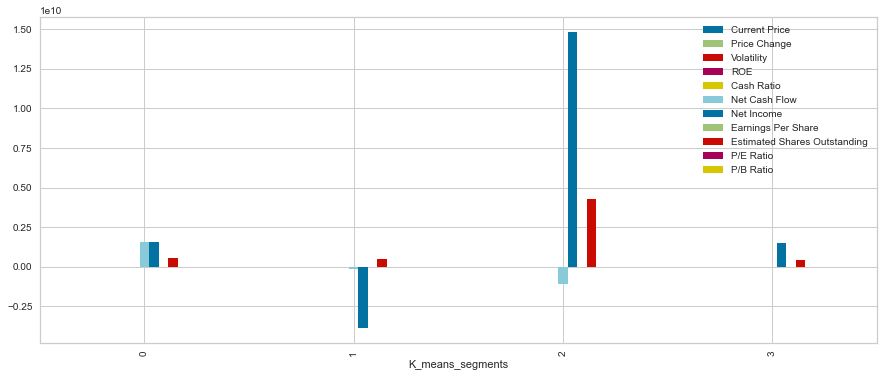

In [49]:
#Plotting a barplot for the means of each cluster
df1.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6));

### From this bar plot, we can visibly observe the following about the clusters
- For cluster 0,they have relatively higher net income than cluster 1, and similar net income to cluster 3. In terms of net cash flow, they have more net cash flow than all other clusters and slightly higher estimated shares outstanding with clusters 1 and 3
- For cluster 1, we can see negative net cash flow, negative net income and estimated shares outstanding that's similar to cluster 0 and 2
- For cluster 2, we can observe the highest Net income and estimated shares outstanding
- Cluster 3 has moderate net income and estimated shares outstanding as well as other variables

In [50]:
pd.crosstab(df1['GICS Sector'], df1.K_means_segments).style.highlight_max(color="lightgreen", axis=0)

K_means_segments,0,1,2,3
GICS Sector,,,,
Consumer Discretionary,6,0,1,33
Consumer Staples,1,0,1,17
Energy,1,22,1,6
Financials,1,0,3,45
Health Care,9,0,2,29
Industrials,0,1,0,52
Information Technology,5,3,1,24
Materials,0,1,0,19
Real Estate,1,0,0,26


### Insights

KMeans Clusters

#### Cluster 0 
**The Big leagues**
- This cluster contains 25 securities characterised by their high current stock prices, high percentage change in price, high cash ratio, high net cash flow, high earnings per share and high price to book ratio.
They have a high ability to repay short term debts based on their cash ratio. looking at their high net cash flow,they also have enough capital to continue the business. Their P/B ratio shows that the stock price is trading at a premium.
It is largely populated by the healthcare sector and is moderately volatile. Based on their market capitaliation properties, they are the large cap stocks.


##### Cluster 1
**Growth companies**
- This cluster contains 27 securities, most of which are in the energy sector.
They are characterised by their high volatility, high ROE, and high P/E ratio. This means they are very unstable and can change quickly in a shorter time, there is therefore higher risk. The high ROE shows that it will be more profitable for Owners and Investors with equity. They are  very profitable investments and based on the properties, they are either new or high growth companies. They are usually small cap stocks based on market capitalization 


##### Cluster 2
**In for the Long term**
- This cluster contains 11 securities, most of which are in the financial sector.
Companies within this cluster are characterised by high net income and high estimated shares outstanding. They are big companies,though with a negative net cash flow which indicates that though they have high revenue, They have mnore money going out than coming in. Considering their other characteristics, they will still be very good investments esoecially if the negative net cash flow is temporary (possibly due to purchase of equipment which will make more profit in the long term)
They also have very low volatility, ROE, P/E and P/B ratio.

##### Cluster 3
**Safe haven**
- This cluster is made of 277 securities. it contains companies from all sectors with the industrials having the highest stocks
They are mainly just about average and have values in between high and low for most variables
They are thus characterized by volatility, price, price change, ROE, cash ratio, net income and EPS that is neither high nor low. this group has the lowest Estimated shares outstanding. They are safe stocks for people who would rather not take too many risks



## Hierarchical Clustering

In [51]:
#Checking the cophenetic correlation for various distance metrics
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [52]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [54]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with euclidean distance and average linkage.
- The cophenetic correlation with Euclidean distance and centroid linkage is slightly less than the Euclidean distance with average linkage
- We will check out their dendograms to see if they give distinct clusters

### Checking dendograms

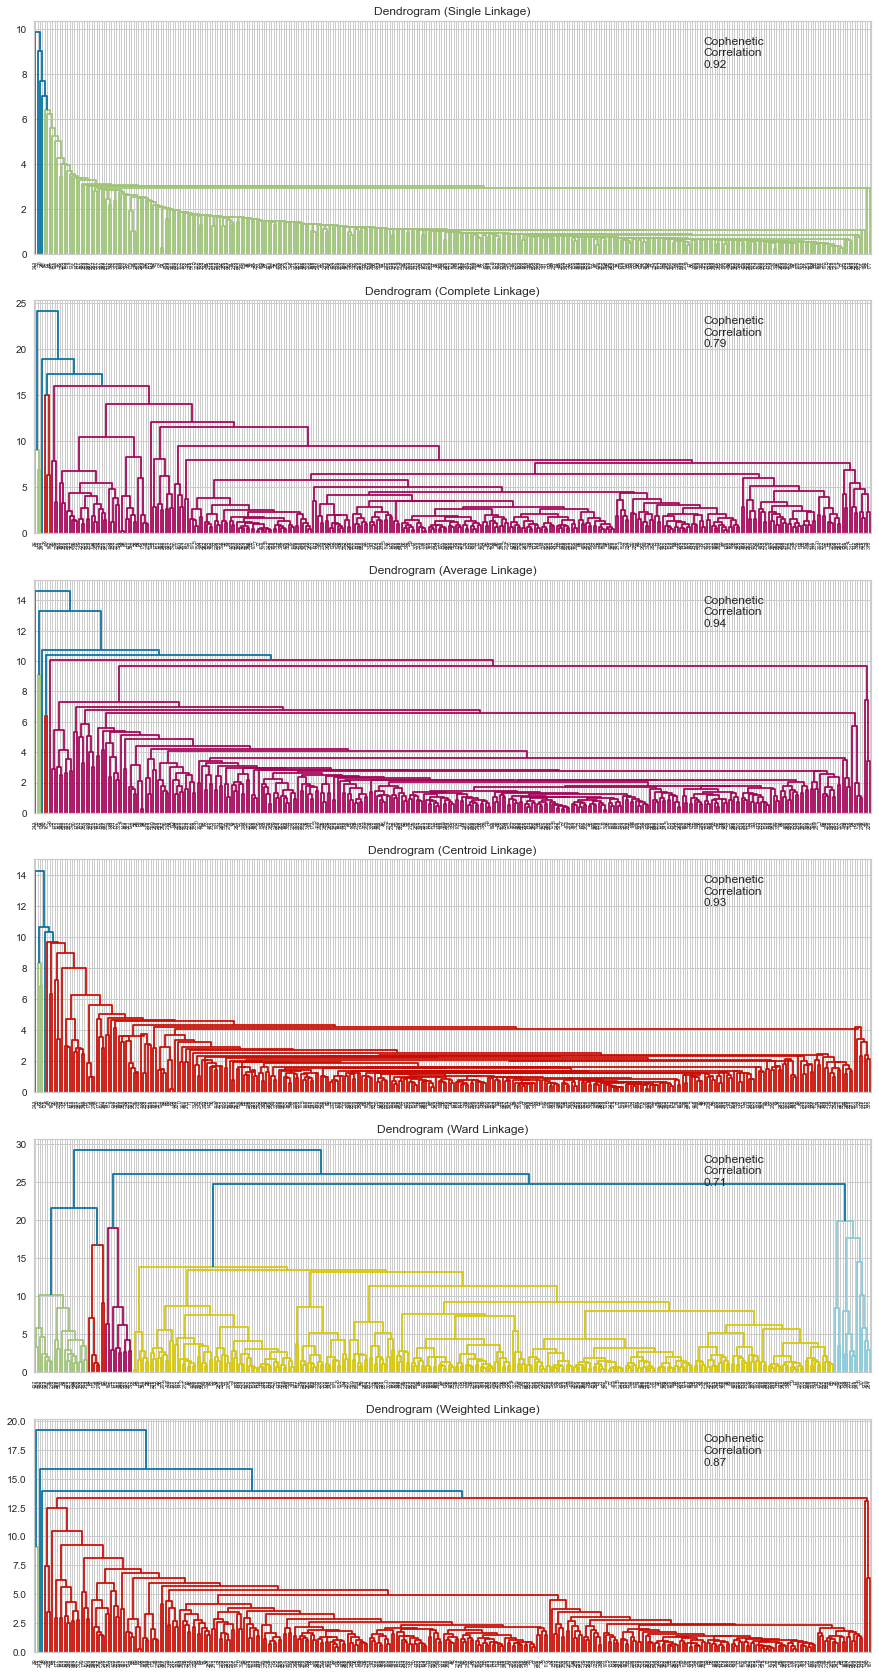

In [55]:
#creating dendograms for the linkage methods
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Though the average and centroid linkage showed the highest cophenetic correlation and their clusters are somewhat distinct compared to single, complete and weighted linkages, the dendogram that shows the most dinstict cluters is the ward linkage.
- The cophenetic correlation of the ward linkage is the lowest, but it shows more dinstinct cliusters than all others, based on the dendogram.
- From the dendrogram of the average and centroid linkages, 5 seems to be a good number of clusters.
- From the dendrogram for ward linkage, 4 seems to be a good number


In [56]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


#### We would check out the dendograms for average and ward, and see how the clusters look.

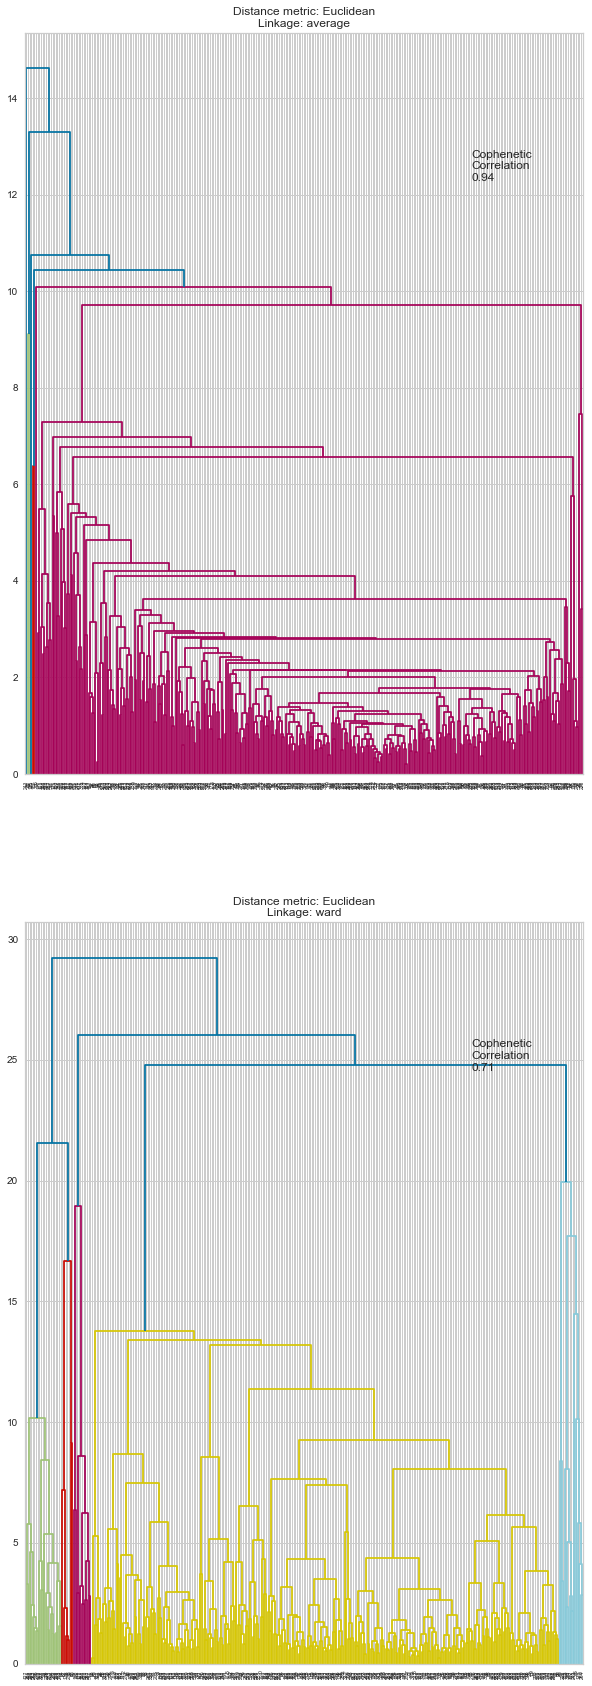

In [57]:
# list of distance metrics
distance_metrics = ["euclidean"]

# list of linkage methods
linkage_methods = ["average", "ward"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

In [58]:
%%time
#Fitting the heirachical clustering model to euclidean distance with average linkage
HCmodel_average = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel_average.fit(subset_scaled_df)

CPU times: user 2.62 ms, sys: 606 µs, total: 3.23 ms
Wall time: 2.51 ms


AgglomerativeClustering(linkage='average', n_clusters=5)

In [59]:
# adding hierarchical cluster labels to the copied dataset and scaled dataframes
df_av = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_Clusters_av"] = HCmodel_average.labels_
df_av["HC_Clusters_av"] = HCmodel_average.labels_

In [60]:
#Printing the companies in each cluster
for cl in df_av["HC_Clusters_av"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_av[df_av["HC_Clusters_av"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 334
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Bank of America Corp', 'Intel Corp.']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the following companies are present:
['Facebook']
Categories (340, object): ['3M Com

In [61]:
#Checking the number of securities per cluster
for cl in df_av["HC_Clusters_av"].unique():
    print("In cluster {}, the number of companies is:".format(cl))
    print(df_av[df_av["HC_Clusters_av"] == cl]["Security"].nunique())
    print()

In cluster 0, the number of companies is:
334

In cluster 2, the number of companies is:
2

In cluster 1, the number of companies is:
2

In cluster 3, the number of companies is:
1

In cluster 4, the number of companies is:
1



- Observations
- We can see that the clusters are not well defined here. we observe about 4 of the 5 clusters having a cluster size of less than 3 securities per cluster. this is not good clustering. hence, we can rather explore the ward clustering option.

In [62]:
%%time
#Fitting the heirachical clustering model choosing euclidean distance and ward linkage
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

CPU times: user 3.24 ms, sys: 1.01 ms, total: 4.25 ms
Wall time: 3.3 ms


AgglomerativeClustering(n_clusters=4)

In [63]:
# adding hierarchical cluster labels to the new copied dataset and scaled dataframes
#copying the dataset
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [64]:
#Printing the companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 275
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Adobe Systems Inc', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Applied Materials Inc', 'Amgen Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 27
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ..., 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 0, the following companies are present:
['Allegion', 'Apache Corporation', 'Anadarko Petroleum Corp', 'Baker Hughes Inc', 'Chesapeake Ene

In [65]:
#Checking the number of securities per cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the number of companies is:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].nunique())
    print()

In cluster 3, the number of companies is:
275

In cluster 1, the number of companies is:
27

In cluster 0, the number of companies is:
29

In cluster 2, the number of companies is:
9



- Observation
- This gives much better clusters in terms of cluster distinction. We can use this as a final model

In [66]:
#grouping the GICS sectors based on the clusters
df2.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Health Care                     0
             Industrials                     1
             Information Technology          1
             Materials                       1
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
1            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          0
             Financials                      1
             Health Care                     8
             Industrials                     0
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Teleco

### Cluster Profiling

In [67]:
#Getting the cluster profiles
cluster_profile = df2.groupby("HC_Clusters").mean()

In [68]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [69]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275


#### Heirerchical Clusters

##### Cluster 0
**Poor today, Rich tomorrow**
- This cluster contains 29 securities, most of which are in the energy sector.
They are characterised by their high volatility and high ROE. This means they are very unstable and can change quickly in a shorter time, there is therefore higher risk. The high ROE shows that it will be more profitable for Owners and Investors with equity. They are  very profitable investments and based on the characteristics, they are either new or high growth companies. They are usually small cap stocks based on market capitalization 



##### Cluster 1 
**Growth for a pretty penny**
- This cluster contains 15 securities characterised by their high current stock prices, high percentage change in price, high cash ratio, high earnings per share, high P/E ratio and high price to book ratio.
They have a high ability to repay short term debts based on their cash ratio.Their P/B ratio shows that the stock price is trading at a premium.
It is largely populated by the healthcare sector and is moderately volatile. Based on their market capitaliation properties, they consist of large cap stocks.



##### Cluster 2
**In for the Long ride**
- This cluster contains 11 securities, most of which are in the financial sector.
Companies within this cluster are characterised by high net cash flow, high net income and high estimated shares outstanding. They are big companies,and have more money coming in rather than going out.
They also have very low volatility, P/E and P/B ratio.


##### Cluster 3
**Safety First**
- This cluster is made of 285 securities. it contains companies from all sectors with the industrials having the highest stocks.
They are mainly just about average and have values in between high and low for most variables
They are thus characterized by volatility, price, price change, ROE, cash ratio, net income and EPS that is neither high nor low. this group has the lowest Estimated shares outstanding. They are safe stocks for people who would rather not take too many risks

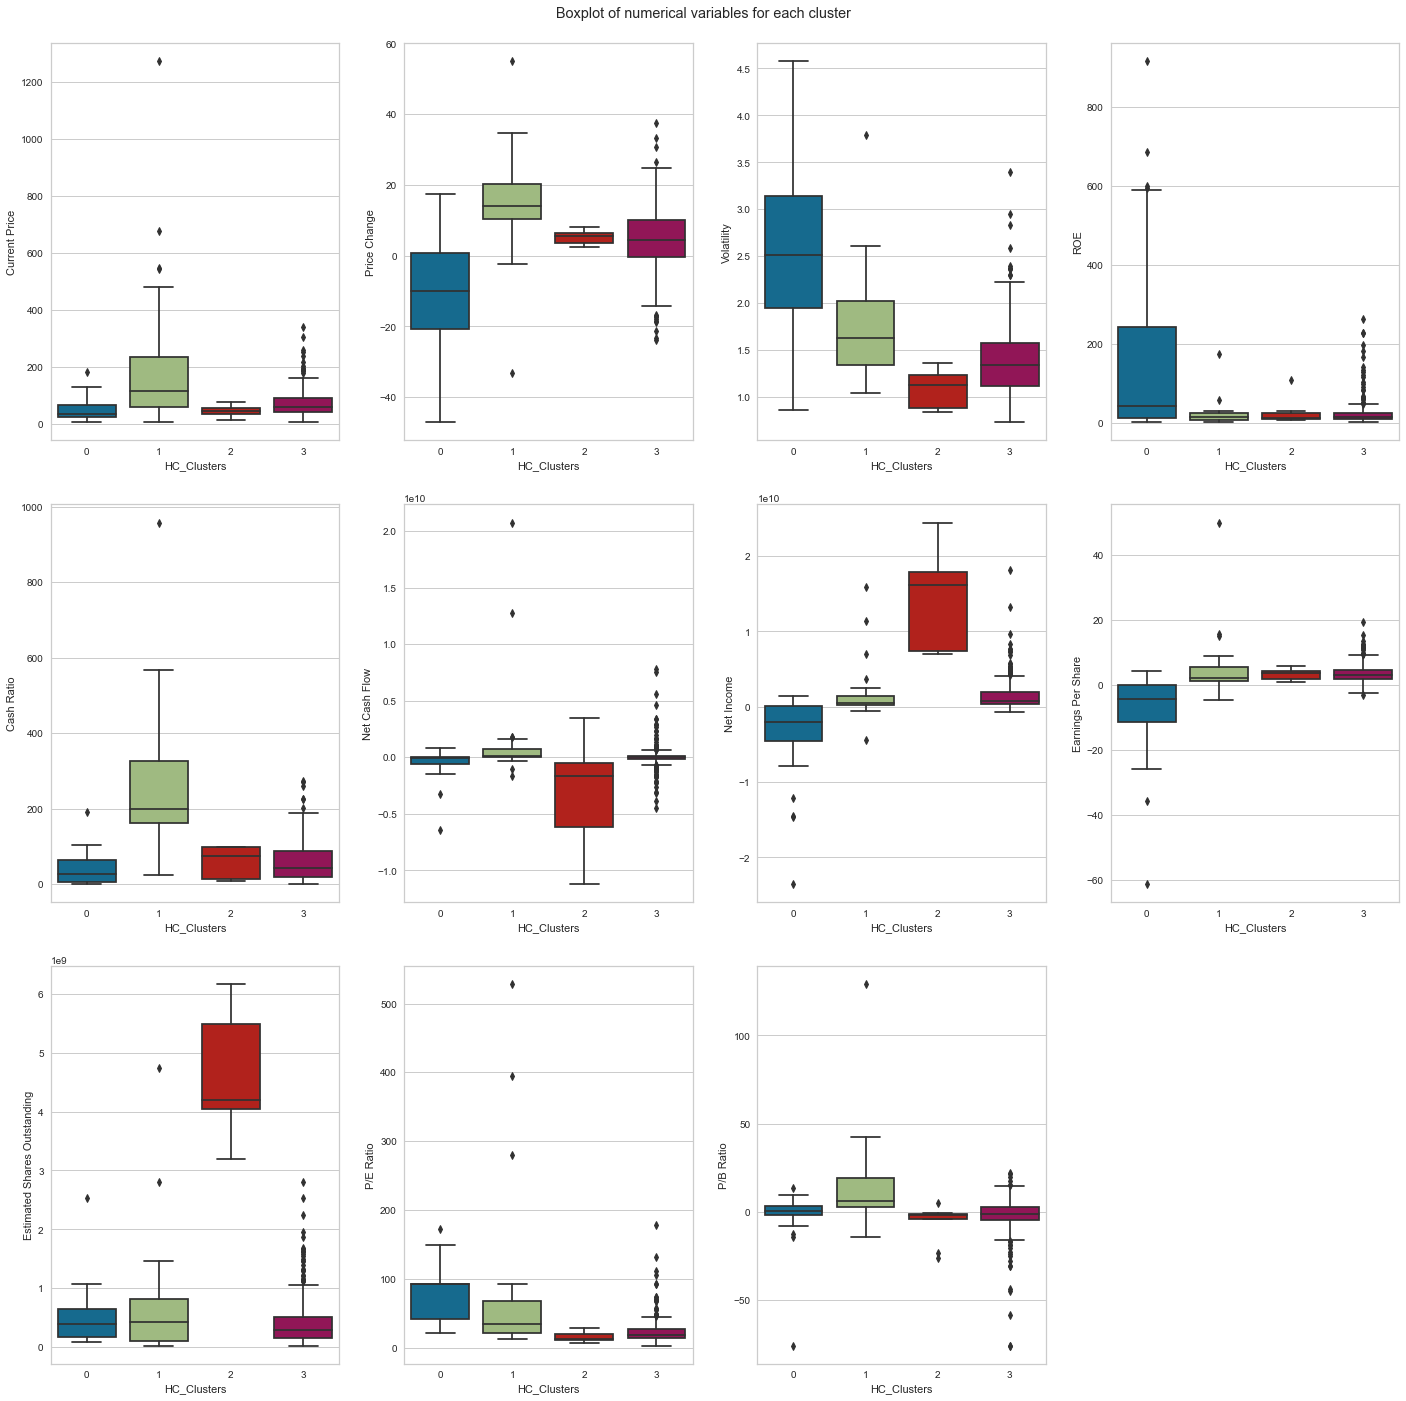

In [70]:
#plotting a boxplot to see the numerical variablesin each cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### From the box plots, we can observe the following about each variable
- Cluster 1 has the highest current price and variance in current price. the lowest current price with very little variance is cluster 2
- Cluster 1 has the highest price change but cluster 0 has the highest variance in price change
- in terms of volatility, cluster 0 has the highest volatility and has the most variance in volatility
- Cluster 0 has the highest ROE and shows the most variance in ROE
- Cluster 1 has the highest cash ratio and shows the highest variance
- In Net cash flow, cluster 2 shows the highest variance.
- Cluster 2 has the highest net income and has the most variance of the 4 clusters
- Cluster 0 has lower earnings per share than others, and also has the most variance. cluster 1 has the largest earnings per share.
- Cluster 2 has the highest estimated shares outstanding,this is a key feature significantly more than the other 3 clusters. It also has the highest variance
- Cluster 1 has the highest P/E ratio on average and the largest variance
- Cluster 1 has the highest P/B ratio and highest variance, while cluster 2 has the lowest variance


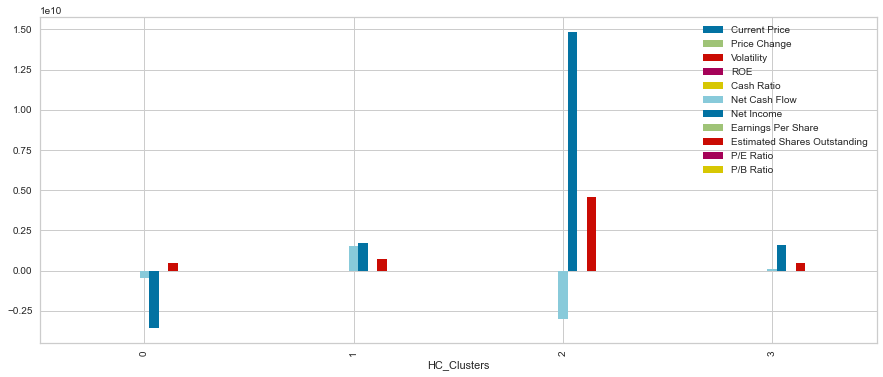

In [71]:
#Plotting a barplot for the means of each cluster
df2.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))
plt.show();

### From this bar plot, we can visibly observe the following about the clusters
- For cluster 0, we can see negative net cash flow, negative net income and estimated shares outstanding that's similar to cluster 1 and 3
- For cluster 1,they have relatively higher net income than cluster 1, and similar net income to cluster 3. In terms of estimated shares outstanding, they have slightly higher estimated shares outstanding than clusters 0 and 3
- For cluster 2, we can observe the highest Net income, net cash flow and estimated shares outstanding
- Cluster 3 has higher net income than clusters 0 and 1 

In [72]:
#Viewing the maximum sector in each cluster
pd.crosstab(df2['GICS Sector'], df2.HC_Clusters).style.highlight_max(color="lightgreen", axis=0)

HC_Clusters,0,1,2,3
GICS Sector,,,,
Consumer Discretionary,1,5,1,33
Consumer Staples,2,1,1,15
Energy,22,0,1,7
Financials,1,1,3,44
Health Care,0,8,1,31
Industrials,1,0,0,52
Information Technology,1,9,0,23
Materials,1,1,0,18
Real Estate,0,1,0,26


### Insights

## K-means vs Hierarchical Clustering

### Observations

- Both the KMeans model and the Agglomerative Clustering model did not take a lot of time as they both executed in milli seconds, however the kmeans clustering took about 178ms in total on avegare and the HC models took less than 10 ms, makig the Hierarchical clustering faster.

- Both algorithms gave very similar clusters
* Cluster 0 (25 securities) in Kmeans is similar to cluster 1 (15 securities) in Heirarchical clustering
* Cluster 1 (27 securities) in Kmeans is similar to cluster 0 (29 securities) in Heirarchical clustering
* Cluster 2 (11 securities) in Kmeans is similar to cluster 2 (11 securities) in Heirarchical clustering
* Cluster 3 (277 securities) in Kmeans is similar to cluster 3 (285 securities) in Heirarchical clustering

- For both algorithms, 4 clusters proved to be the appropriate number. 

- Both algorithms yielded similar clusters 

**Though they yielded similar clusters, the number of securities are different in all clusters except cluster 2 on both algorithms. Another difference in both algorithms also show in the cluster profiles** 
* Cluster 0 in Kmeans has the highest current price price change, cash ratio, net cash flow, earnings per share and P/B ratio, while the similar HC cluster 1 has all but net cash flow and includes highest P/E ratio alongside Volatility and ROE but cluster 0 in HC has the highest Volatility and ROE only
* Cluster 1 in Kmeans has the highest P/E ratio alongside Volatility and ROE but cluster 0 in HC has the highest Volatility and ROE only
* Cluster 2 in Kmeans has the highest net income and estimated shares outstanding while HC cluster 2 has all these and further includes highest net cash flow


### Insights and Recommendations

- Trade & Ahead would need to identify the behaviour and appetite of their clients in terms of financial goals and position, risk appetite, and investment time/duration. They can achieve this by regularly conducting surveys.
Once this is done, they can adequately recommend a suitable cluster to them

- For clients that would like to take advantage of highly volatile stocks, to make numerous payoffs in a shorter time or buy the stocks at a cheaper price when it's low, trade and ahead can recommend that they invest in the clusters that contain highly volatile securities like Kmeans cluster 1/ HC cluster 0

- For clients who prefer safer investments with moderate price, risks and profits, they can recommend that they invest in the safe clusters like cluster 3 on both kmeans and HC algorithms

- For clients who would like to invest in a diversified portfolio, they can also recommend cluster 3 in kmeans which is similar to cluster 3 in heirachical

- For clients who prefer high yield and would like to invest in companies with a good track record of success that costs not as high as blue chip companies but offer great long term profits can be adviced to invest in cluster 2 in Kmeans and HC clustering profile 

- For clients who would like to invest in large companies with strong brands and need consistent and regular dividend payments, they can recommend cluster 0 in kmeans and the similar cluster 1 in HC. These are safe investments, but at a higher cost. 


- For Trade and Ahead to stay on top of the game in their business, they will need to cluster their customers cluster their stick securities well as well. thus, Trade and Ahead will need to ensure that the clustering exercise is done frequently and kept up to date since stocks are generally volatile and new securities may be introduced which do not fit into any of the already available clusters. This, alongside other analysis will also help them in stock picking more accurately

- For Trade and Ahead to stay on top of the game in their business, they will need to cluster their customers cluster their stick securities well as well. they can add stock picking to their services andneed to be able to accurately
